<a href="https://colab.research.google.com/github/SAHANASahana345/DST_ML/blob/main/ML_Project(cars).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [92]:
from google.colab import files
uploaded = files.upload()

# Then read it (assuming filename is correct)
import pandas as pd
data = pd.read_csv('used_cars.csv')

Saving used_cars.csv to used_cars (3).csv


In [ ]:
data.head(5)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [ ]:
data['engine']=data['engine'].astype('str')


In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [ ]:
data.shape

(4009, 12)

In [ ]:
data.transmission.value_counts()

,count
transmission,
A/T,1037
8-Speed A/T,406
Transmission w/Dual Shift Mode,398
6-Speed A/T,362
6-Speed M/T,248
...,...
10-Speed Automatic with Overdrive,1
9-Speed Automatic with Auto-Shift,1
SCHEDULED FOR OR IN PRODUCTION,1


In [ ]:
data.transmission.unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [ ]:
data.isnull().sum()


,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [ ]:
data.describe()


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


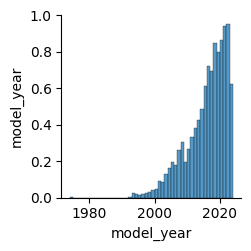

In [ ]:
sns.pairplot(data)


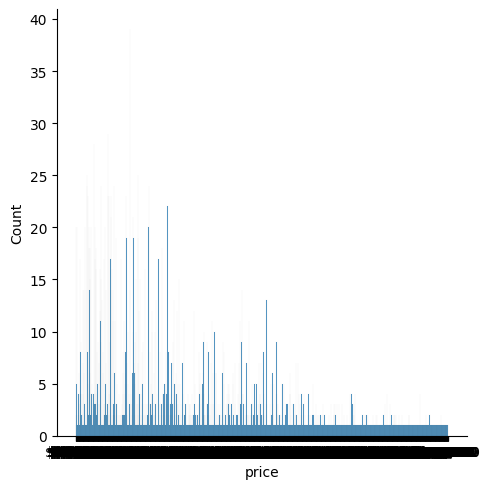

In [ ]:
sns.displot(data['price'])

<Axes: >

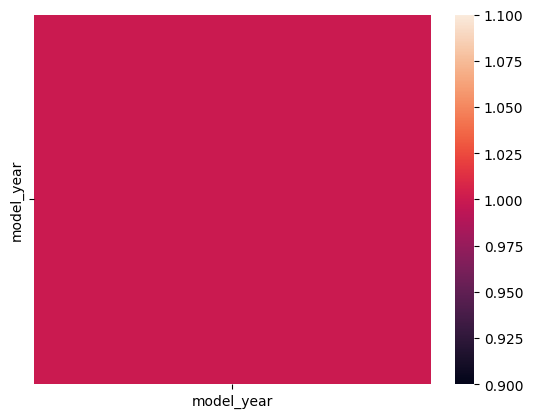

In [ ]:
sns.heatmap(data.corr(numeric_only=True))



In [ ]:
corr_matrix = data.corr(numeric_only=True)

In [ ]:

X = data[['model_year', 'milage']]
y = data['price']

data.shape



(4009, 12)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3207, 3641), (802, 3641))

In [ ]:
y_train.shape, y_test.shape


((3207,), (802,))

In [ ]:
data['price'] = data['price'].str.replace('$', '', regex=False)     # Remove dollar sign
data['price'] = data['price'].str.replace(',', '', regex=False)     # Remove comma
data['price'] = data['price'].astype(float)                         # Convert to float

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('used_cars.csv')

# Clean 'milage' column
data['milage'] = data['milage'].str.replace('mi.', '', regex=False)
data['milage'] = data['milage'].str.replace(',', '', regex=False)
data['milage'] = data['milage'].astype(float)

# Clean 'price' column (this fixes your current error)
data['price'] = data['price'].str.replace('$', '', regex=False)
data['price'] = data['price'].str.replace(',', '', regex=False)
data['price'] = data['price'].astype(float)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def accident_col(df):
    df['accident_dummy'] = df['accident'].apply(lambda x: 0 if x == 'NONE REPORTED' else (1 if x == 'AT LEAST 1 ACCIDENT OR DAMAGE REPORTED' else None))
    return df


In [ ]:
def transmission_col(df):
    def classify_transmission(transmission):
        if 'M/T' in transmission or 'MT' in transmission or 'MANUAL' in transmission:
            return 'M/T'
        elif 'A/T' in transmission or 'AT' in transmission or 'AUTOMATIC' in transmission:
            return 'A/T'
        else:
            return 'OTHER'

    df['transmission'] = df['transmission'].apply(classify_transmission)
    return df

In [ ]:
def ext_and_int_col(df):
    df['ext_col'] = df['ext_col'].replace({
        r'.*BLACK.*': 'BLACK',
        r'.*WHITE.*': 'WHITE',
        r'.*GRAY.*': 'GRAY',
        r'.*SILVER.*': 'SILVER',
        r'.*BLUE.*': 'BLUE',
        r'.*RED.*': 'RED',
    }, regex=True)

    df['ext_col'] = df['ext_col'].apply(lambda x: x if x in ['BLACK', 'WHITE', 'GRAY', 'SILVER', 'BLUE', 'RED'] else 'OTHERS')

    df['int_col'] = df['int_col'].replace({
        r'.*BLACK.*': 'IBLACK',
        r'.*WHITE.*': 'IWHITE',
        r'.*GRAY.*': 'IGRAY',
        r'.*SILVER.*': 'ISILVER',
        r'.*BLUE.*': 'IBLUE',
        r'.*RED.*': 'IRED',
        r'.*GREEN.*': 'IGREEN',
        r'.*BEIGE.*': 'IBEIGE',
        r'.*ORANGE.*': 'IORANGE',
    }, regex=True)

    df['int_col'] = df['int_col'].apply(lambda x: x if x in ['IBLACK', 'IBEIGE', 'IGRAY'] else 'IOTHERS')

    return df

In [ ]:
def fuel_type_col(df):
    df['fuel_type'] = df['fuel_type'].replace({'HYBRID': 'HYBRID', 'PLUG-IN HYBRID': 'HYBRID','NOT SUPPORTED':'OTHER','–':'OTHER'})
    return df

In [ ]:
def engine_col(df):
    # Create hp column
    df['hp'] = df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float, errors='ignore')

    # Create engine displacement
    df['engine displacement'] = df['engine'].str.extract(r'(\d+\.\d+)L')
    df['engine displacement'] = df['engine displacement'].fillna(df['engine'].str.extract(r'(\d+\.\d+)LITER')[0])
    df['engine displacement'] = df['engine displacement'].astype(float, errors='ignore')

    # Create cylinder
    df['cylinder'] = df['engine'].str.extract(r'(\d+) CYLINDER')
    df['cylinder'] = df['cylinder'].fillna(df['engine'].str.extract(r'V(\d)')[0])
    df['cylinder'] = df['cylinder'].astype('Int64', errors='ignore')

    # Create fuel type
    df['fuel'] = df['engine'].str.extract(r'(GASOLINE|DIESEL|ELECTRIC|HYBRID)')
    df['fuel_type'] = df['fuel_type'].combine_first(df['fuel'])

    # Is it V type or not
    df['is_v_engine'] = df['engine'].str.contains(r'V\d+', case=False, na=False)

    # Create turbo
    df['turbo'] = df['engine'].str.contains('TWIN TURBO', case=False, na=False)

    # Create dohc
    df['dohc'] = df['engine'].str.contains('DOHC', case=False, na=False)
    return df

In [ ]:
def fill_na(df, bugatti_avg_hp_external=1300):
    df['hp'] = df.groupby('brand')['hp'].transform(lambda x: x.fillna(x.mean()))
    df.loc[(df['brand'] == 'BUGATTI') & (df['hp'].isnull()), 'hp'] = bugatti_avg_hp_external

    most_common_fuel = df.groupby('brand')['fuel_type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    most_common_displacement = df.groupby('brand')['engine displacement'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    most_common_cylinder = df.groupby('brand')['cylinder'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

    df['fuel_type'] = df.apply(
        lambda row: most_common_fuel[row['brand']] if pd.isna(row['fuel_type']) else row['fuel_type'],
        axis=1
    )

    df['engine displacement'] = df.apply(
        lambda row: most_common_displacement[row['brand']] if pd.isna(row['engine displacement']) else row['engine displacement'],
        axis=1
    )

    df['cylinder'] = df.apply(
        lambda row: most_common_cylinder[row['brand']] if pd.isna(row['cylinder']) else row['cylinder'],
        axis=1
    )

    df['cylinder'] = df.apply(
        lambda row: most_common_cylinder[row['brand']] if pd.isna(row['cylinder']) else row['cylinder'],
        axis=1
    )
    df['accident_dummy'].fillna(0, inplace=True)

    if df['cylinder'].isnull().any():
        most_common_cylinder_value = df['cylinder'].mode()[0]
        df['cylinder'].fillna(most_common_cylinder_value, inplace=True)

    return df

In [ ]:
def one_hot_encoding(df):
    df= pd.get_dummies(df, columns=['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col'], drop_first=False)
    return df

In [ ]:
def age_and_usage(df):
    current_year = 2024
    df['age'] = current_year - df['model_year']

    df['annual_km'] = df.apply(
        lambda row: row['milage'] / row['age'] if row['age'] > 0 else row['milage'],
        axis=1
    )

    return df

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
def accident_col(df):
    df['accident_dummy'] = df['accident'].apply(lambda x: 0 if x == 'NONE REPORTED' else (1 if x == 'AT LEAST 1 ACCIDENT OR DAMAGE REPORTED' else None))
    return df

In [ ]:
data = accident_col(data)

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,accident_dummy
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",None
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",None
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598",None
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",None
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999",None


In [ ]:
def transmission_col(df):
    def classify_transmission(transmission):
        if 'M/T' in transmission or 'MT' in transmission or 'MANUAL' in transmission:
            return 'M/T'
        elif 'A/T' in transmission or 'AT' in transmission or 'AUTOMATIC' in transmission:
            return 'A/T'
        else:
            return 'OTHER'

    df['transmission'] = df['transmission'].apply(classify_transmission)
    return df

In [ ]:
data = transmission_col(data)

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,accident_dummy
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",None
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,OTHER,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",None
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,OTHER,Blue,Black,None reported,NaN,"$54,598",None
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,A/T,Black,Black,None reported,Yes,"$15,500",None
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,OTHER,Glacier White Metallic,Black,None reported,NaN,"$34,999",None


In [ ]:
def ext_and_int_col(df):
    df['ext_col'] = df['ext_col'].replace({
        r'.*BLACK.*': 'BLACK',
        r'.*WHITE.*': 'WHITE',
        r'.*GRAY.*': 'GRAY',
        r'.*SILVER.*': 'SILVER',
        r'.*BLUE.*': 'BLUE',
        r'.*RED.*': 'RED',
    }, regex=True)

    df['ext_col'] = df['ext_col'].apply(lambda x: x if x in ['BLACK', 'WHITE', 'GRAY', 'SILVER', 'BLUE', 'RED'] else 'OTHERS')

    df['int_col'] = df['int_col'].replace({
        r'.*BLACK.*': 'IBLACK',
        r'.*WHITE.*': 'IWHITE',
        r'.*GRAY.*': 'IGRAY',
        r'.*SILVER.*': 'ISILVER',
        r'.*BLUE.*': 'IBLUE',
        r'.*RED.*': 'IRED',
        r'.*GREEN.*': 'IGREEN',
        r'.*BEIGE.*': 'IBEIGE',
        r'.*ORANGE.*': 'IORANGE',
    }, regex=True)

    df['int_col'] = df['int_col'].apply(lambda x: x if x in ['IBLACK', 'IBEIGE', 'IGRAY'] else 'IOTHERS')

    return df

In [ ]:
data = ext_and_int_col(data)

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,accident_dummy
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,A/T,OTHERS,IOTHERS,At least 1 accident or damage reported,Yes,"$10,300",None
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,OTHER,OTHERS,IOTHERS,At least 1 accident or damage reported,Yes,"$38,005",None
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,OTHER,OTHERS,IOTHERS,None reported,NaN,"$54,598",None
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,A/T,OTHERS,IOTHERS,None reported,Yes,"$15,500",None
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,OTHER,OTHERS,IOTHERS,None reported,NaN,"$34,999",None


In [ ]:
def fuel_type_col(df):
    df['fuel_type'] = df['fuel_type'].replace({'HYBRID': 'HYBRID', 'PLUG-IN HYBRID': 'HYBRID','NOT SUPPORTED':'OTHER','–':'OTHER'})
    return df

In [ ]:
data = fuel_type_col(data)

In [ ]:
def engine_col(df):
    # Create hp column
    df['hp'] = df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float, errors='ignore')

    # Create engine displacement
    df['engine displacement'] = df['engine'].str.extract(r'(\d+\.\d+)L')
    df['engine displacement'] = df['engine displacement'].fillna(df['engine'].str.extract(r'(\d+\.\d+)LITER')[0])
    df['engine displacement'] = df['engine displacement'].astype(float, errors='ignore')

    # Create cylinder
    df['cylinder'] = df['engine'].str.extract(r'(\d+) CYLINDER')
    df['cylinder'] = df['cylinder'].fillna(df['engine'].str.extract(r'V(\d)')[0])
    df['cylinder'] = df['cylinder'].astype('Int64', errors='ignore')

    # Create fuel type
    df['fuel'] = df['engine'].str.extract(r'(GASOLINE|DIESEL|ELECTRIC|HYBRID)')
    df['fuel_type'] = df['fuel_type'].combine_first(df['fuel'])

    # Is it V type or not
    df['is_v_engine'] = df['engine'].str.contains(r'V\d+', case=False, na=False)

    # Create turbo
    df['turbo'] = df['engine'].str.contains('TWIN TURBO', case=False, na=False)

    # Create dohc
    df['dohc'] = df['engine'].str.contains('DOHC', case=False, na=False)
    return df

In [ ]:
data = engine_col(data)

In [ ]:
def fill_na(df, bugatti_avg_hp_external=1300):
    df['hp'] = df.groupby('brand')['hp'].transform(lambda x: x.fillna(x.mean()))
    df.loc[(df['brand'] == 'BUGATTI') & (df['hp'].isnull()), 'hp'] = bugatti_avg_hp_external

    most_common_fuel = df.groupby('brand')['fuel_type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    most_common_displacement = df.groupby('brand')['engine displacement'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    most_common_cylinder = df.groupby('brand')['cylinder'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

    df['fuel_type'] = df.apply(
        lambda row: most_common_fuel[row['brand']] if pd.isna(row['fuel_type']) else row['fuel_type'],
        axis=1
    )

    df['engine displacement'] = df.apply(
        lambda row: most_common_displacement[row['brand']] if pd.isna(row['engine displacement']) else row['engine displacement'],
        axis=1
    )

    df['cylinder'] = df.apply(
        lambda row: most_common_cylinder[row['brand']] if pd.isna(row['cylinder']) else row['cylinder'],
        axis=1
    )
    df['accident_dummy'].fillna(0, inplace=True)

    if df['cylinder'].isnull().any():
        most_common_cylinder_value = df['cylinder'].mode()[0]
        df['cylinder'].fillna(most_common_cylinder_value, inplace=True)

    return df

In [ ]:
data =  fill_na(data)

/tmp/ipython-input-3273482840.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident_dummy'].fillna(0, inplace=True)
/tmp/ipython-input-3273482840.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['accident_dummy'].fillna(0, inplace=True)
/tmp/ipython-input-3273482840.py:27: FutureWarning: A va

In [ ]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,accident_dummy,hp,engine displacement,cylinder,fuel,is_v_engine,turbo,dohc
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,A/T,OTHERS,IOTHERS,At least 1 accident or damage reported,Yes,"$10,300",0,300.000000,3.7,6,NaN,True,False,False
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,OTHER,OTHERS,IOTHERS,At least 1 accident or damage reported,Yes,"$38,005",0,246.700000,3.8,6,NaN,True,False,True
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,OTHER,OTHERS,IOTHERS,None reported,NaN,"$54,598",0,303.659259,3.5,6,NaN,False,False,True
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,A/T,OTHERS,IOTHERS,None reported,Yes,"$15,500",0,354.000000,3.5,6,NaN,True,False,False
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,OTHER,OTHERS,IOTHERS,None reported,NaN,"$34,999",0,318.831250,2.0,6,NaN,False,False,True


In [ ]:
def one_hot_encoding(df):
    df= pd.get_dummies(df, columns=['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col'], drop_first=False)
    return df

In [ ]:
data = one_hot_encoding(data)

In [ ]:
def age_and_usage(df):
    current_year = 2024
    df['age'] = current_year - df['model_year']

    df['annual_km'] = df.apply(
        lambda row: row['milage'] / row['age'] if row['age'] > 0 else row['milage'],
        axis=1
    )

    return df

In [ ]:
def model_create(df, target='price', model_type='lightgbm'):
    X = df.drop([target], axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    if  model_type == 'xgboost':
        model = XGBRegressor()
    elif model_type == 'lightgbm':
        model = LGBMRegressor(verbosity=-1)
    else:
        raise ValueError("Change it. ")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return model, X_train, X_test, y_train, y_test, y_pred

In [ ]:
def bayesian_hyperparameter_optimization(X_train, y_train, model_type):
    if model_type == 'lightgbm':
        model = LGBMRegressor(verbosity=-1)
        search_spaces = {
            'n_estimators': (30, 300),
            'learning_rate': (0.01, 0.2, 'log-uniform'),
            'num_leaves': (10, 100),
            'max_depth': (-1, 15),
        }

    elif model_type == 'xgboost':
        model = XGBRegressor()
        search_spaces = {
            'n_estimators': (100, 500),
            'learning_rate': (0.01, 0.3, 'log-uniform'),
            'max_depth': (3, 15),
            'min_child_weight': (1, 10)
        }

    else:
        raise ValueError("Change it.")

    opt = BayesSearchCV(model, search_spaces, n_iter=32, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,random_state=42)
    opt.fit(X_train, y_train)

    return opt.best_estimator_, opt.best_params_

In [ ]:
def change_outlier(df):
    Q1 = df['price'].quantile(0.01)
    Q3 = df['price'].quantile(0.99)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    df.loc[df['price'] < lower_bound, 'price'] = lower_bound
    df.loc[df['price'] > upper_bound, 'price'] = upper_bound

    return df

In [ ]:
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    return rmse

In [ ]:
def all_processing(df, bugatti_avg_hp_external=1300):
    df = df.drop(columns=['id', 'model', 'clean_title'])

    df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

    df = accident_col(df)

    df = transmission_col(df)

    df = ext_and_int_col(df)

    df = fuel_type_col(df)

    df = engine_col(df)

    df = fill_na(df, bugatti_avg_hp_external)

    df= one_hot_encoding(df)
    df= age_and_usage(df)
    #df=change_outlier(df)
    df = df.drop(columns=['fuel', 'engine', 'accident'], )

    return df

In [ ]:
df_train=all_processing(data)

KeyError: "['id'] not found in axis"